In [3]:
from IPython.display import clear_output, display

In [2]:
#model_id = './dreambooth_trained_dreamscape' #andyoh
model_id = './dreambooth_dreamscaper_serlinaengshilin_v2' #serlinaengshilin

In [107]:
from diffusers import DiffusionPipeline
from diffusers.utils import make_image_grid
from diffusers import AutoPipelineForText2Image, DEISMultistepScheduler
import torch

pipe = AutoPipelineForText2Image.from_pretrained(model_id,safety_checker = None, torch_dtype=torch.float16, force_download=True, variant="fp16")
pipe.scheduler = DEISMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

def get_inputs(batch_size=1):
    generator = [torch.Generator("cuda").manual_seed(i) for i in range(batch_size)]
    prompts = batch_size * [prompt]
    negative_prompts = batch_size * [negative_prompt]
    num_inference_steps = 35
    width = 1024
    height = 768

    return {"prompt": prompts, "negative_prompt": negative_prompts, "generator": generator, "num_inference_steps": num_inference_steps}

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
prompt = "ultra realistic portrait ((serlinaengshilin)), NASA white space suit, beard, mars planet on the background,  hyper detail, cinematic, Canon EOS R3, f/1.8, ISO 100, 8K, RAW, unedited, in-frame, unreal engine 5. art by artgerm and greg rutkowski and alphonse mucha"
negative_prompt = "painting, mole on the face, poorly drawn face, deformed face, deformed, ugly, blurry, bad proportions, cloned face, skinny, missing lips, missing chin, ugly face, distorted face, anime"

In [ ]:
prompt = "ultra realistic portrait of ((serlinaengshilin as a long hair general in ancient chinese armor)), ready to fight in a picturesque mountain, dramatic light, pale sunrise, cinematic lighting, battered, low angle, 4k, hyper realistic, focused, extreme details, unreal engine 5, cinematic, masterpiece, art by studio ghibli, intricate artwork by john william turner"
negative_prompt = "painting, short hair, mole on the face, poorly drawn eyes, dirty face, poorly drawn face, deformed face, deformed, ugly, blurry, bad proportions, cloned face, skinny, missing lips, missing chin, ugly face, distorted face"

In [ ]:
prompt="ultra realistic portrait, ((serlinaengshilin as kung fu master in traditional chinese tunic outfit)), pale sunrise,8K, 3d resolution, detailed,realistic,playstation 5 screenshot ,cryengine,Beautiful Lighting --ar 9:16 --stylize 7500 --quality 2 --no blur dof bokeh"
negative_prompt = "painting, short hair, mole on the face, dirty face, poorly drawn face, poorly drawn eyes, deformed face, deformed, ugly, blurry, bad proportions, cloned face, skinny, missing lips, missing chin, ugly face, distorted face"

In [ ]:
prompt = "amazingly detailed, masterpiece, ultra hd, dynamic angle, kung fu warrior, training,action pose, motion, fantasy, hyper-realistic, amazing fine detail, rich colors, realistic texture, vignette, moody, dark, epic, gorgeous, film grain,grainy, beautiful lighting, rim lighting, magical, shallow depth of field, photography, neo noir, volumetric lighting, raytracing, studio quality, octane render,"

In [ ]:
prompt = "ultra realistic close up portrait ((a happy looking astronaut serlinaengshilin inside a space shuttle)), NASA white space suit , hyper detail, cinematic lighting, playstation 5 screenshot ,cryengine,Beautiful Lighting --ar 9:16 --stylize 7500 --quality 2,  shallow depth of field"

negative_prompt = "painting, blemishes on the face, mole on the face, poorly drawn face, wrinkles, poorly drawn eyes, deformed face, deformed, ugly, blurry, bad proportions, cloned face, skinny, missing lips, missing chin, ugly face, distorted face, anime"

In [ ]:
prompt = "ultra realistic front view portrait, ((serlinaengshilin as a firefighter, brown color iris, ready for action)), new york firefighter suit and helmet, new york cityscape on fire and fire engines in the background,realistic,playstation 5 screenshot ,cryengine,dramatic lighting, highly detailed, octane render, 8k, unreal engine 5, Beautiful Lighting,"
negative_prompt = "painting, blemishes on the face, deformed eyes, deformed iris, mole on the face, poorly drawn teeth, poorly drawn face, wrinkles, poorly drawn eyes, deformed face, deformed, ugly, blurry, bad proportions, cloned face, skinny, missing lips, missing chin, ugly face, distorted face, anime"

In [ ]:
prompt = "hot dark hair girl serlinaengshilin,  looking at viewer, portrait, photography, detailed skin, realistic, photo-realistic, 8k, highly detailed, full length frame, High detail RAW color art,  diffused soft lighting, shallow depth of field, sharp focus, hyperrealism, cinematic lighting, pale sunrise"
negative_prompt = "blemishes on the face, frowning"

In [4]:
prompt = "ethereal and clean portrait of serlinaengshilin Unreal Engine 5, pristine glass-like face skin quality, radiating a sense of purity and clarity, ethereal essence character, captivating futuristic render, beautiful angelical face, pale, beautiful face, beautiful mouth, smiling, bright smile, middle shot, realistic hands"
negative_prompt = "blemishes on the face, frowning"

In [108]:
prompt = '(bilateral symmetrical:1.5), ethereal and clean, serlinaengshilin as a futuristic female cyborg with full mechanical augmentations in a sleek  chrome metallic suit in tron city,, playstation 5 screenshot ,cryengine,  Unreal Engine 5, pristine glass-like face skin quality, ethereal essence character, cinematic, hyper detailed, ultra realistic, '
negative_prompt = "painting, unnatural gaze, blemishes on the face, deformed eyes, deformed iris, mole on the face, poorly drawn teeth, poorly drawn face, wrinkles, poorly drawn eyes, deformed face, deformed, ugly, blurry, bad proportions, cloned face, skinny, missing lips, missing chin, ugly face, distorted face"

  0%|          | 0/35 [00:00<?, ?it/s]

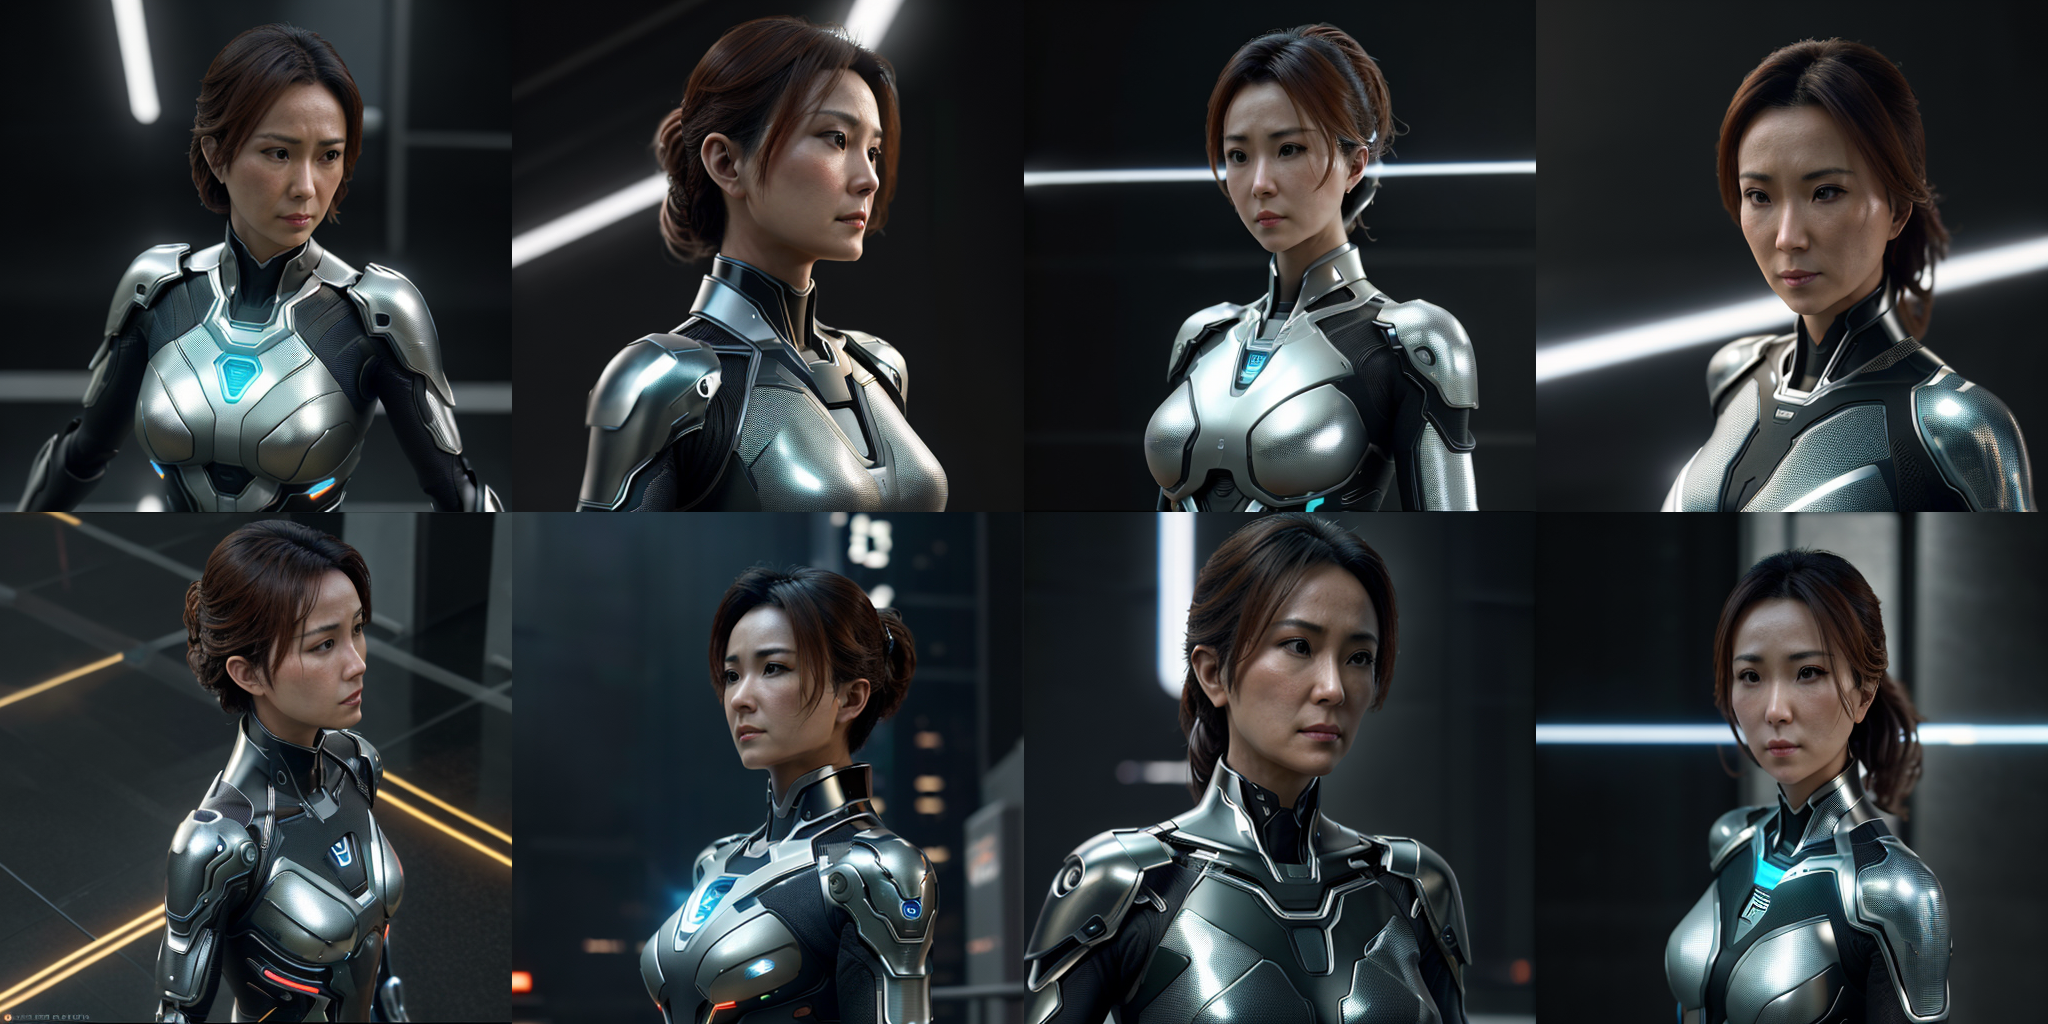

In [109]:
images = pipe(**get_inputs(batch_size=8)).images
make_image_grid(images, 2, 4)

In [84]:
images[6].save(f'wife_cyborg{2}.png')

In [20]:
for i in range(0,len(images)):
    images[i].save(f'wife_angel{i}.png')
    

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

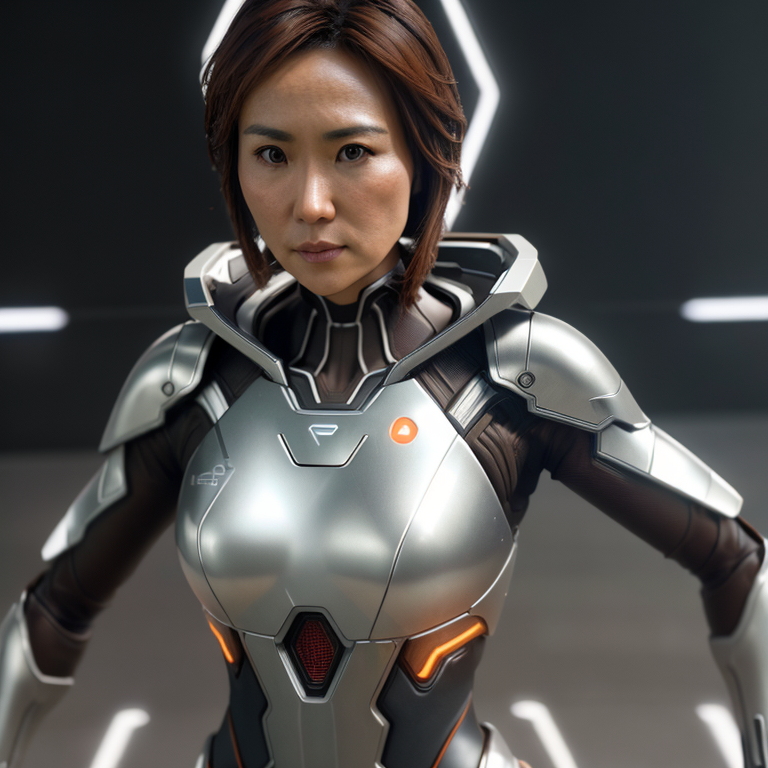

In [268]:
import json
import torch
from diffusers import AutoPipelineForText2Image, DEISMultistepScheduler
import random

payload = json.loads(json.dumps({  
    "model_id": './dreambooth_dreamscaper_serlinaengshilin',
    "prompt": "ultra realistic of serlinaengshilin as a futuristic female cyborg with full mechanical augmentations in a full chrome metallic suit, looking into the camera, brown iris, short bob cut hair, inside tron like spaceship with neon orange lights ,pristine glass-like face skin quality,  playstation 5 screenshot ,cryengine,  Unreal Engine 5, cinematic, hyper-detailed",
    "negative_prompt":  "painting, big breast, crossed eyes, cloned arms, cloned body, mangled fingers, unnatural gaze, blemishes on the face, deformed eyes, deformed iris, mole on the face, poorly drawn teeth, poorly drawn face, wrinkles, poorly drawn eyes, deformed face, deformed, ugly, blurry, bad proportions, cloned face, skinny, missing lips, missing chin, ugly face, distorted face",
    "width": 768,
    "height": 768,
    "samples": "1",
    "num_inference_steps": "50",
    "safety_checker": "no",
    "enhance_prompt": "yes",
    "seed": None,
    "guidance_scale": 8,
    "multi_lingual": "no",
    "panorama": "no",
    "self_attention": "no",
    "upscale": "no",
    "seed":random.randint(1,100000)
}))

pipe = AutoPipelineForText2Image.from_pretrained(payload['model_id'], torch_dtype=torch.float16, force_download=True, variant="fp16")
pipe.scheduler = DEISMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")
#clear_output()
prompt = payload['prompt']
negative_prompt = payload['negative_prompt']
num_inference_steps = int(payload['num_inference_steps'])


generator = torch.manual_seed(payload['seed']) if payload['seed'] is not None else None
image = pipe(prompt, 
             negative_prompt=negative_prompt, 
             generator=generator,
             num_inference_steps=num_inference_steps,
             resize_method="aspect",
             width=payload["width"],
             height=payload["height"]).images[0]
#image.save("./imageN1.png")
display(image)

In [266]:
image.save("./wife_cyborg_27.png")

In [ ]:
A futuristic female cyborg with mechanical augmentations, prominently featuring an eye implanted with an advanced chip capable of displaying information. She is dressed in a sleek black athletic outfit that enhances her agile form. The setting is a dimly lit urban environment, highlighting the glow from her informational eye display. The overall tone is dark and mysterious, with a hint of neon lights reflecting off her metallic parts.

In [ ]:

ethereal and clean, serlinaengshilin as a futuristic female cyborg with full mechanical augmentations in a sleek  chrome metallic suit, futuristic landscape in the background, Unreal Engine 5, pristine glass-like face skin quality, ethereal essence character, captivating futuristic render, beautiful face, beautiful mouth, cinematic, hyper detailed, ultra realistic, 